In [2]:
from sklearn import preprocessing
import pandas as pd
import numpy as np

df = pd.read_csv("flights.csv", nrows = 1000)
df = df[["ARRIVAL_DELAY", "DEPARTURE_DELAY", "DISTANCE", "AIR_TIME"]].dropna()
df = df.astype(np.float64)

In [3]:
x_scaled = preprocessing.scale(df)
x_scaled

array([[-0.68583644, -0.53171035,  0.82633099,  0.54288083],
       [-0.26758345, -0.42524416,  2.26631195,  1.81223466],
       [ 0.18284283, -0.2123118 ,  2.21080248,  1.85274595],
       ...,
       [-0.26758345, -0.38975544, -0.49446787, -0.61844288],
       [-1.61886232, -0.38975544,  2.43610563,  1.71770831],
       [ 0.76196235, -0.42524416, -1.32547729, -1.26662356]])

In [4]:
x_scaled.mean(axis = 0)

array([-2.32964831e-17,  1.16482416e-17,  6.21239550e-17, -4.27102191e-17])

In [5]:
x_scaled.std(axis = 0)

array([1., 1., 1., 1.])

In [6]:
df.iloc[2]#muestra la línea 2 del frame?

ARRIVAL_DELAY         5.0
DEPARTURE_DELAY      -2.0
DISTANCE           2296.0
AIR_TIME            266.0
Name: 2, dtype: float64

In [7]:
x_scaled[2]

array([ 0.18284283, -0.2123118 ,  2.21080248,  1.85274595])

In [8]:
min_max_scaler = preprocessing.MinMaxScaler([0,10])
x_train_minmax = min_max_scaler.fit_transform(df) #ajusta la variable al dataframe?
x_train_minmax

array([[0.67915691, 0.18324607, 5.12430427, 4.10666667],
       [0.98360656, 0.2617801 , 8.39703154, 6.61333333],
       [1.31147541, 0.41884817, 8.27087199, 6.69333333],
       ...,
       [0.98360656, 0.28795812, 2.12244898, 1.81333333],
       [0.        , 0.28795812, 8.78293135, 6.42666667],
       [1.73302108, 0.2617801 , 0.23376623, 0.53333333]])

In [9]:
#TRANSFORMACIÓN DE VARIABLES CATEGÓRICAS
df2 = pd.read_csv("flights.csv", nrows = 10)
pd.get_dummies(df2["ORIGIN_AIRPORT"])

,ANC,LAS,LAX,SEA,SFO
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,0,1,0
5,0,0,0,0,1
6,0,1,0,0,0
7,0,0,1,0,0
8,0,0,0,0,1
9,0,1,0,0,0


In [10]:
#KMEANS
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv("flights.csv", nrows = 1000)
newdf = df[["DEPARTURE_DELAY", "AIR_TIME"]].dropna()
newdf = newdf.astype(np.float64)

In [11]:
kmeans = KMeans(n_clusters = 4, n_jobs = -1).fit(newdf)
kmeans.labels_

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 3, 0, 0, 1, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2,
       0, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 3, 2, 2, 2, 0, 0, 0, 2, 0,
       2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 3, 0, 2, 2, 1, 1, 0, 0, 2,
       2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 3, 2, 0, 3, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2,
       1, 2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 3, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2,
       2, 2, 0, 0, 2, 1, 2, 3, 2, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 0,
       0, 1, 2, 0, 0, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0,
       1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 3, 2, 0, 2, 2,

In [12]:
np.unique(kmeans.labels_, return_counts = True)

(array([0, 1, 2, 3], dtype=int32), array([375, 125, 386,  29]))

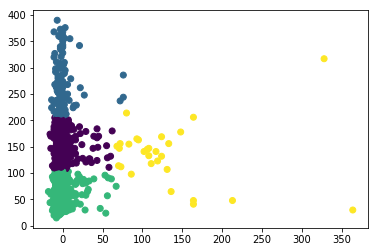

In [13]:
plt.scatter(newdf["DEPARTURE_DELAY"], newdf["AIR_TIME"], c = kmeans.labels_)
plt.show()

In [14]:
kmeans.cluster_centers_

array([[ 2.61333333e-01,  1.47394667e+02],
       [ 2.48000000e-01,  2.69136000e+02],
       [-6.21761658e-01,  6.48056995e+01],
       [ 1.29482759e+02,  1.35172414e+02]])

In [15]:
alldf = pd.read_csv("flights.csv", nrows = 10000)[["DEPARTURE_DELAY", "AIR_TIME"]].dropna()
kmeans.predict(alldf)[0:50]

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1,
       0, 0, 0, 1, 0, 1], dtype=int32)

In [16]:
new2df = df[["AIR_TIME", "DISTANCE", "TAXI_OUT", "ARRIVAL_DELAY", "DEPARTURE_DELAY"]].dropna()
kmeans = KMeans(n_clusters = 4, n_jobs = -1).fit(new2df)
kmeans.labels_

array([1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3,
       2, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 3, 3, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0,
       2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2,
       0, 2, 1, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 0, 3, 1, 2, 2, 0,
       0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0,
       3, 2, 0, 2, 0, 3, 1, 2, 1, 2, 0, 2, 3, 3, 1, 2, 1, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 0,
       0, 0, 2, 2, 0, 3, 2, 1, 0, 1, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2,
       2, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2,
       1, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 0,

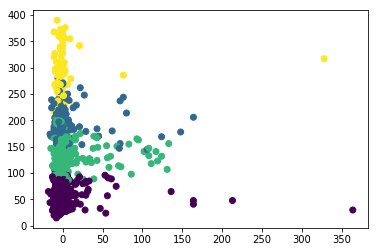

In [17]:
plt.scatter(new2df["DEPARTURE_DELAY"], new2df["AIR_TIME"], c = kmeans.labels_)
plt.show()

In [18]:
#HIERARCHICAL CLUSTERING
from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv("flights.csv", nrows = 1000)
newdf = df[["AIR_TIME", "DEPARTURE_DELAY"]].dropna()

In [20]:
clstr = AgglomerativeClustering(n_clusters = 5)
clstr.fit(newdf)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func='deprecated')

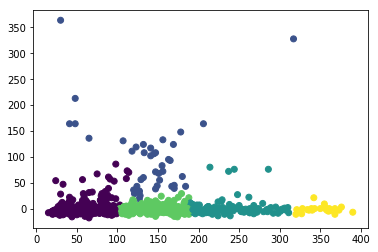

In [21]:
plt.scatter(newdf["AIR_TIME"], newdf["DEPARTURE_DELAY"], c = clstr.fit_predict(newdf))
plt.show()

In [23]:
nnewdf = pd.read_csv("flights.csv", nrows = 1000)[["DEPARTURE_DELAY", "AIR_TIME"]].dropna()
clstr.fit_predict(nnewdf)[0:10]

array([3, 2, 2, 2, 2, 2, 3, 2, 3, 3])